## Making your first domain

In order to access the spatial analysis tools provided by MuSpAn, it needs to know what your data looks like. In this tutorial, we introduce the concept of a <i>domain</i>, the central object of interest within MuSpAn. You can think of the domain as being a container holding all the information relevant to a single spatial frame of reference, such as a region of interest. Let's make a new domain now, by calling ```ms.domain()```:

In [1]:
# Import the MuSpAn library
import muspan as ms

# Create a new domain with the name 'Example'
my_domain = ms.domain('Example')

# Print the details of the newly created domain
print(my_domain)

Domain name: Example
Number of objects: 0
Collections: []
Labels: [] 
Networks: [] 
Distance matrices: []


This domain is pretty boring at the moment, because there's nothing in it. ```ms.domain()``` requires us to give the domain a name (useful for when we're working with multiple regions of interest at once), here 'Example'. Calling ```print(my_domain)``` tells us about the contents of the domain, but at the moment there's nothing there. We need to populate our domain with some data.

Spatial data is stored in MuSpAn as <i>objects</i>: each object can be a <i>point</i>, <i>line</i>, or <i>shape</i>. Let's use [numpy](https://numpy.org/) to generate some points, and then add them to the domain.

In [2]:
# Import the numpy library for numerical operations
import numpy as np

# Generate an array of 100 points, each with an x and y coordinate
points = np.random.rand(100, 2)

# Add the generated points to the domain under the collection 'Uniformly random points'
my_domain.add_points(points, 'Uniformly random points')

# Print the details of the domain to see the added points
print(my_domain)

Domain name: Example
Number of objects: 100
Collections: ['Uniformly random points']
Labels: [] 
Networks: [] 
Distance matrices: []


Just like that, we have 100 new objects in our domain. Each object has it's own ID - here, they will have been assigned IDs 0 to 99 - which can be used to locate the object in ```my_domain.objects``` if we want to. Notice that one of the mysterious lists below has also gained an entry - we now have a <i>collection</i> named ```'Uniformly random points'```. Every object in MuSpAn must belong to at least one <i>collection</i>, which is just MuSpAn's way of describing a set of objects with something in common (if you don't specify a collection when you add objects, MuSpAn will just make a ```'default_collection'``` and add them to that).

MuSpAn isn't primarily intended to be a visualisation tool, but it's always handy to be able to see our data. MuSpAn uses [matplotlib](https://matplotlib.org/) to provide some handy tools to see your data quickly, so we'll import that too. Let's take a look at our points, using the ```ms.visualise.visualise()``` command:

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

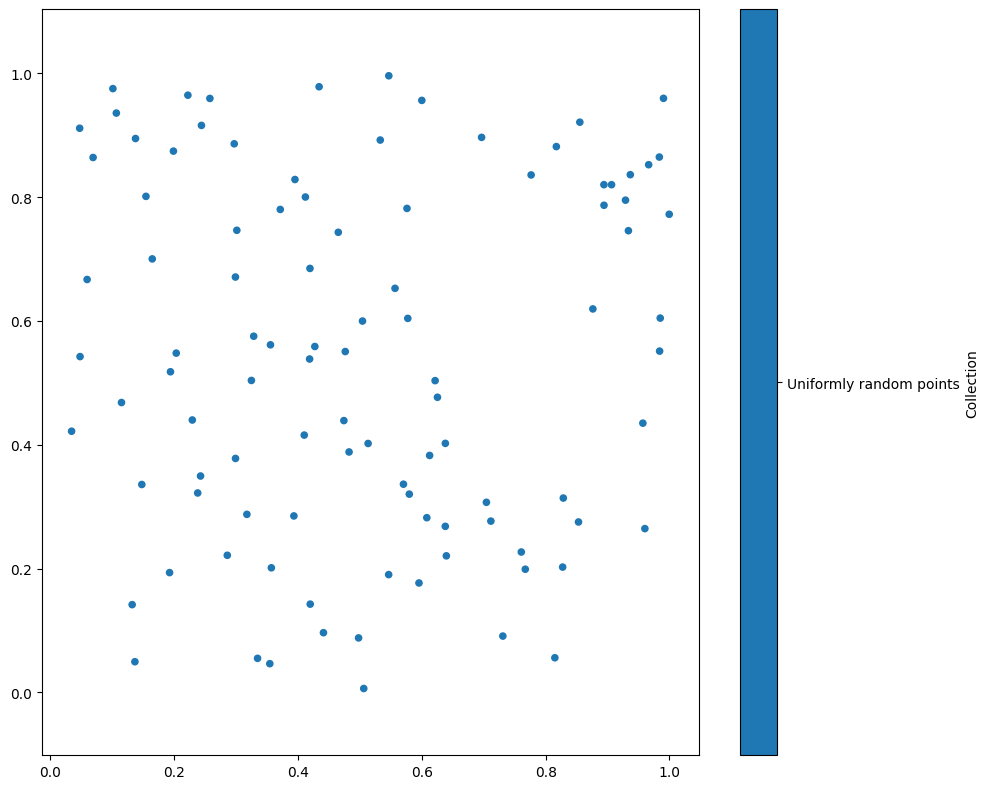

In [3]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Visualise the domain using MuSpAn's visualisation tool
# This will plot the points we added to the domain in the axis we've just made
ms.visualise.visualise(my_domain)

A crucial part of the domain is the <i>boundary</i> - in order to do spatial analysis, we need to know not just what objects we're analysing, but also what space they live in! Many of the statistics calculated by MuSpAn will be affected not just by the data you put in, but also by the domain in which they are calculated (for instance, many spatial statistics use the density of points to generate null distributions against which to compare data, which is affected both by the number of points and the area of the domain). 

Just because we haven't specified a boundary (yet) doesn't mean that it isn't there. MuSpAn automatically infers a domain boundary whenever we make a domain, or add new data. By default, this boundary will be the minimal axis aligned bounding box for the data. The boundary is a special type of <i>shape</i> object - it can be accessed easily via ```my_domain.boundary```, e.g.:

In [4]:
print(my_domain.boundary)

Shape: ID -1, formed of 4 vertices


The boundary always has ID -1, and in this case we can see that it is formed from 4 <i>vertices</i>. Every object in MuSpAn is made of vertices. These are just 2D coordinates that define the object. Every point is made of 1 vertex, a line is an ordered list of vertices, and a shape is an ordered list of vertices that finishes where it started (note that MuSpAn has other requirements for shapes and lines, such as not being self-intersecting, but let's not worry about that for now).

Our boundary shape has 4 vertices - where are they? By default, ```ms.visualise.visualise()``` doesn't show the domain boundary, but we can easily turn it on by passing the argument ```show_boundary=True```.

Vertex IDs: [104, 105, 106, 107]
Vertex coordinates: [[0.0343322  0.00628987]
 [0.0343322  0.99598843]
 [0.99960238 0.99598843]
 [0.99960238 0.00628987]]
Domain area: 0.9553265010073392


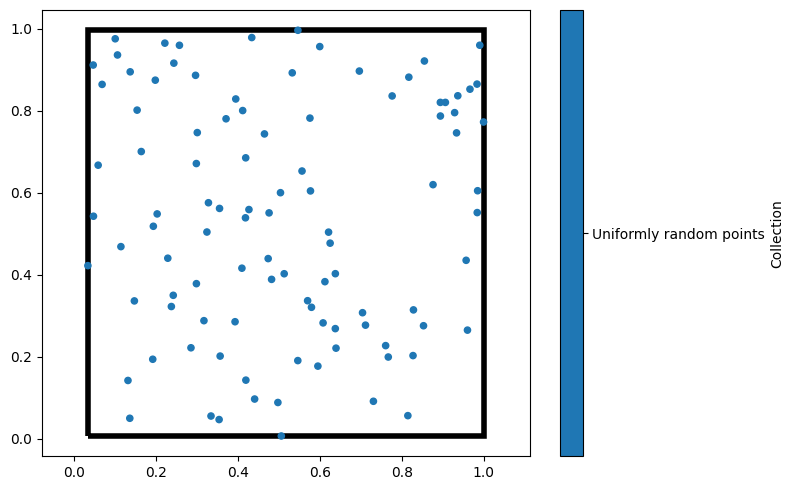

In [5]:
# Create a new figure with a specified size
plt.figure(figsize=(8, 5))

# Visualise the domain using MuSpAn's visualisation tool
# This will plot the points we added to the domain and show the boundary
ms.visualise.visualise(my_domain, ax=plt.gca(), show_boundary=True)

# Get the vertex IDs of the boundary
boundary_vertex_IDs = my_domain.boundary.vertices

# Print the vertex IDs of the boundary
print(f'Vertex IDs: {boundary_vertex_IDs}')

# Print the coordinates of the boundary vertices
print(f'Vertex coordinates: {my_domain.vertices[boundary_vertex_IDs]}')

# Print the area of the domain boundary
print(f'Domain area: {my_domain.boundary.area}')

In general, we don't need to worry about vertices or their IDs, as they're just used by MuSpAn to keep track of what's what inside the domain. Since MuSpAn has estimated the boundary based on the points that we've added, we can see here that the boundary that MuSpAn has settled on for our data isn't quite the unit square (as no points were sampled in the corners). This is an important thing to take into account when calculating, for example, spatial statistics, but let's ignore it for now and add some more points to a different collection. We'll generate some normally distributed points using NumPy.

(<Figure size 800x500 with 2 Axes>, <Axes: >)

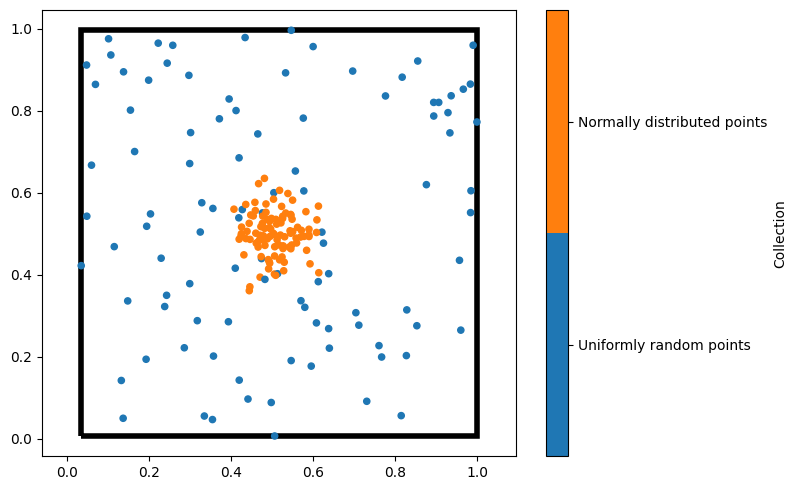

In [6]:
# Define the mean and standard deviation for the normal distribution
mean = 0.5
sd = 0.05

# Generate an array of 100 points with normally distributed x and y coordinates
more_points = np.random.normal(loc=mean, scale=sd, size=(100, 2))

# Add the generated points to the domain under the collection 'Normally distributed points'
my_domain.add_points(more_points, 'Normally distributed points')

# Create a new figure with a specified size
plt.figure(figsize=(8, 5))

# Visualise the domain using MuSpAn's visualisation tool
# This will plot all the points we added to the domain and show the boundary
ms.visualise.visualise(my_domain, ax=plt.gca(), show_boundary=True)

By default, MuSpAn colours objects according to their collection. The MuSpAn ```visualisation``` module offers some handy ways of changing this, including messing around with the colour maps or colouring by different properties; please see the tutorials on visualisation for more details.